In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")

In [22]:
fuel_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Remove duplicates from the dataset
fuel_df = fuel_df.drop_duplicates()

# Filter out the 'N' fuel type
fuel_df = fuel_df[fuel_df['Fuel Type'] != 'N']
# fuel_df = fuel_df[fuel_df['Fuel Type'] != 'Z']

# Sample 140 instances from each fuel type
fuel_df = fuel_df.groupby('Fuel Type').sample(n=140, random_state=1)

# Count the number of instances of each fuel type
fuel_type_counts = fuel_df['Fuel Type'].value_counts()

# Display the counts
print(fuel_type_counts)
fuel_df

D    140
E    140
X    140
Z    140
Name: Fuel Type, dtype: int64


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4716,FORD,F-150,PICKUP TRUCK - STANDARD,3.0,6,AS10,D,10.8,8.0,9.5,30,256
4571,CHEVROLET,CRUZE DIESEL,COMPACT,1.6,4,A9,D,7.7,5.0,6.5,43,175
2277,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,2.0,4,AS8,D,7.7,5.7,6.8,42,183
4741,FORD,F-150 4X4 XL/XLT,PICKUP TRUCK - STANDARD,3.0,6,AS10,D,11.2,8.4,9.9,29,266
4581,CHEVROLET,EQUINOX AWD,SUV - SMALL,1.6,4,A6,D,8.5,6.1,7.4,38,198
...,...,...,...,...,...,...,...,...,...,...,...,...
6997,JAGUAR,XE P300 AWD,COMPACT,2.0,4,AS8,Z,10.7,7.7,9.4,30,220
2215,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,343
2207,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235
3409,BMW,650i xDRIVE COUPE,COMPACT,4.4,8,AS8,Z,13.8,9.1,11.7,24,273


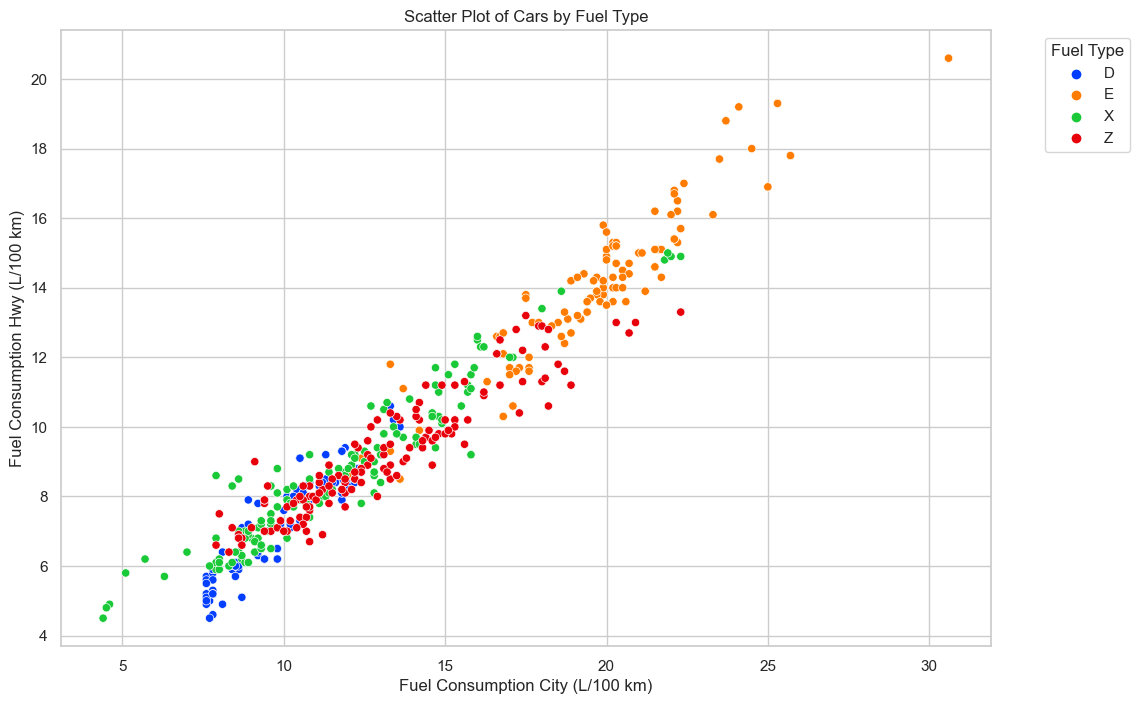

In [23]:
# Create a scatter plot focusing only on Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


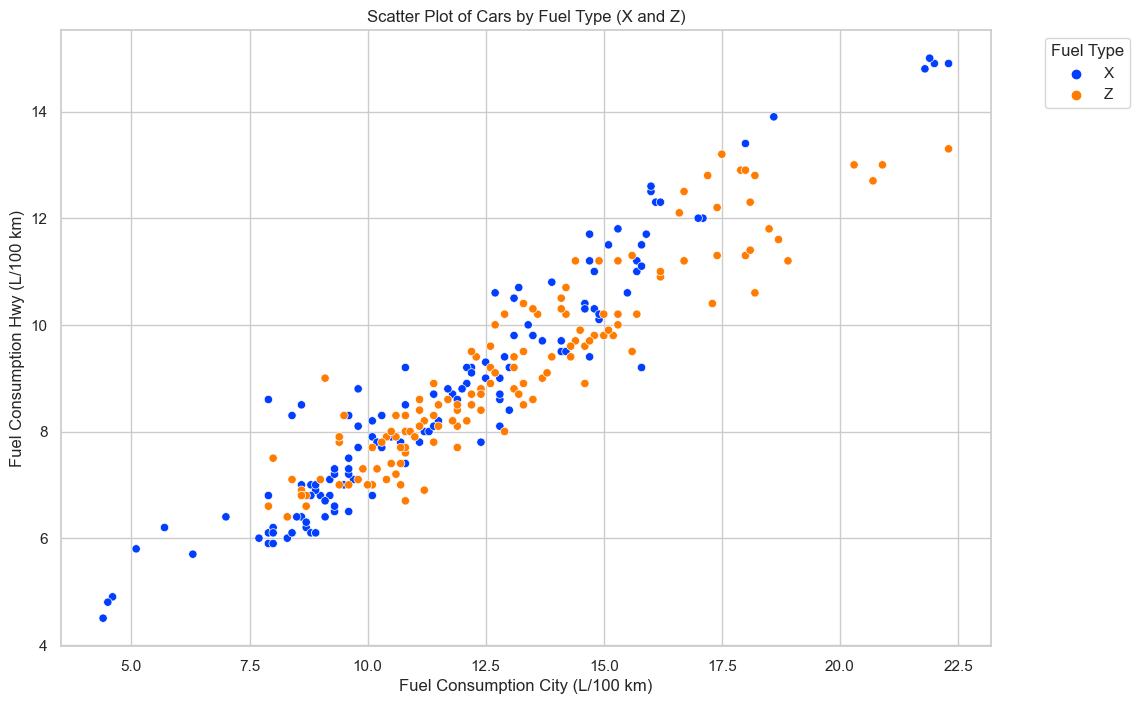

In [24]:
# Create a temporary subset of the data with only fuel types 'X' and 'Z'
temp_df = fuel_df[fuel_df['Fuel Type'].isin(['X', 'Z'])]

# Create the scatter plot for this subset
plt.figure(figsize=(12, 8))
sns.scatterplot(data=temp_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type (X and Z)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In this graph, there is significant overlap, and I am unsure how well an algorithm could perform splitting this. I will test this, and explore further depending on the performance.

In [25]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Filter the dataset to include only Fuel Types 'X' and 'Z'
filtered_df = fuel_df[fuel_df['Fuel Type'].isin(['X', 'Z'])]

# Define features and target variable
# Assuming you still want to predict 'Fuel Type' based on city and highway fuel consumption
X = filtered_df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = filtered_df['Fuel Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# Initialize the classifiers
log_clf = LogisticRegression(max_iter=1000) # Increase max_iter if convergence issues arise
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
    voting='hard'
)

# Fit and predict with each classifier
for clf in (svm_clf, log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")



SVC accuracy: 0.6875
LogisticRegression accuracy: 0.6071428571428571
RandomForestClassifier accuracy: 0.6517857142857143
VotingClassifier accuracy: 0.6875


These are severely low accuracies. I will try out another set of fuel types to test performance:

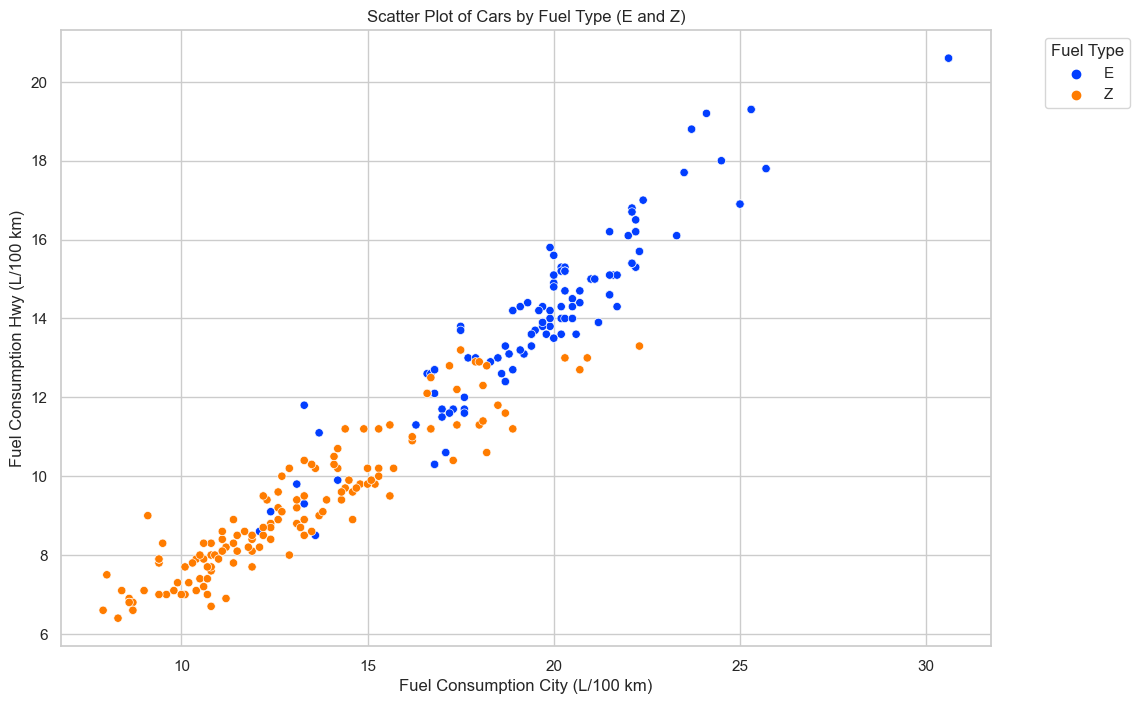

In [26]:
# Filter the dataset for Fuel Types 'E' and 'Z'
ez_df = fuel_df[fuel_df['Fuel Type'].isin(['E', 'Z'])]

# Create the scatter plot for Fuel Types 'E' and 'Z'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ez_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type (E and Z)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# Filter the dataset to include only Fuel Types 'E' and 'Z'
ez_df = fuel_df[fuel_df['Fuel Type'].isin(['E', 'Z'])]

# Define features and target variable for 'E' and 'Z'
ez_X = ez_df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
ez_y = ez_df['Fuel Type']

# Splitting the dataset into training and testing sets for 'E' and 'Z'
ez_X_train, ez_X_test, ez_y_train, ez_y_test = train_test_split(ez_X, ez_y, test_size=0.4, random_state=9)

# Initialize the classifiers for 'E' and 'Z'
ez_log_clf = LogisticRegression(max_iter=1000)
ez_rnd_clf = RandomForestClassifier()
ez_svm_clf = SVC()

# Create the voting classifier for 'E' and 'Z'
ez_voting_clf = VotingClassifier(
    estimators=[('lr', ez_log_clf), ('rf', ez_rnd_clf), ('svm', ez_svm_clf)],
    voting='hard'
)

# Fit and predict with each classifier for 'E' and 'Z'
for clf in (ez_svm_clf, ez_log_clf, ez_rnd_clf, ez_voting_clf):
    clf.fit(ez_X_train, ez_y_train)
    ez_y_pred = clf.predict(ez_X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(ez_y_test, ez_y_pred)}")


SVC accuracy: 0.8214285714285714
LogisticRegression accuracy: 0.8571428571428571
RandomForestClassifier accuracy: 0.8571428571428571
VotingClassifier accuracy: 0.8482142857142857


Now we have two sets of data. One with a decent accuracy and one with a low accuracy. I will focus on the X and Z data set (The one with low accuracy)

Let's begin with bagging

In [28]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           X       0.57      0.34      0.42        50
           Z       0.60      0.79      0.68        62

    accuracy                           0.59       112
   macro avg       0.58      0.57      0.55       112
weighted avg       0.58      0.59      0.57       112
 

Tree Classification Report
              precision    recall  f1-score   support

           X       0.57      0.62      0.60        50
           Z       0.67      0.63      0.65        62

    accuracy                           0.62       112
   macro avg       0.62      0.62      0.62       112
weighted avg       0.63      0.62      0.63       112
 



In [29]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           X       0.57      0.34      0.42        50
           Z       0.60      0.79      0.68        62

    accuracy                           0.59       112
   macro avg       0.58      0.57      0.55       112
weighted avg       0.58      0.59      0.57       112
 



In [30]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(ez_X, 
                                                    ez_y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           E       1.00      0.68      0.81        50
           Z       0.79      1.00      0.89        62

    accuracy                           0.86       112
   macro avg       0.90      0.84      0.85       112
weighted avg       0.89      0.86      0.85       112
 

Tree Classification Report
              precision    recall  f1-score   support

           E       0.88      0.84      0.86        50
           Z       0.88      0.90      0.89        62

    accuracy                           0.88       112
   macro avg       0.88      0.87      0.87       112
weighted avg       0.88      0.88      0.87       112
 



The stump classifier performed well in this case. This implies that the data is linearly seperable for the most part.

In [31]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           E       1.00      0.68      0.81        50
           Z       0.79      1.00      0.89        62

    accuracy                           0.86       112
   macro avg       0.90      0.84      0.85       112
weighted avg       0.89      0.86      0.85       112
 



In both cases, the bagging classification didn't perform better. This is due to the shape of the data. (Explain what type of data would be ideal for the bagging classification)

Refering to what I did in k-Nearest Neighbor. I am curious how ensemble method will perform with the following data

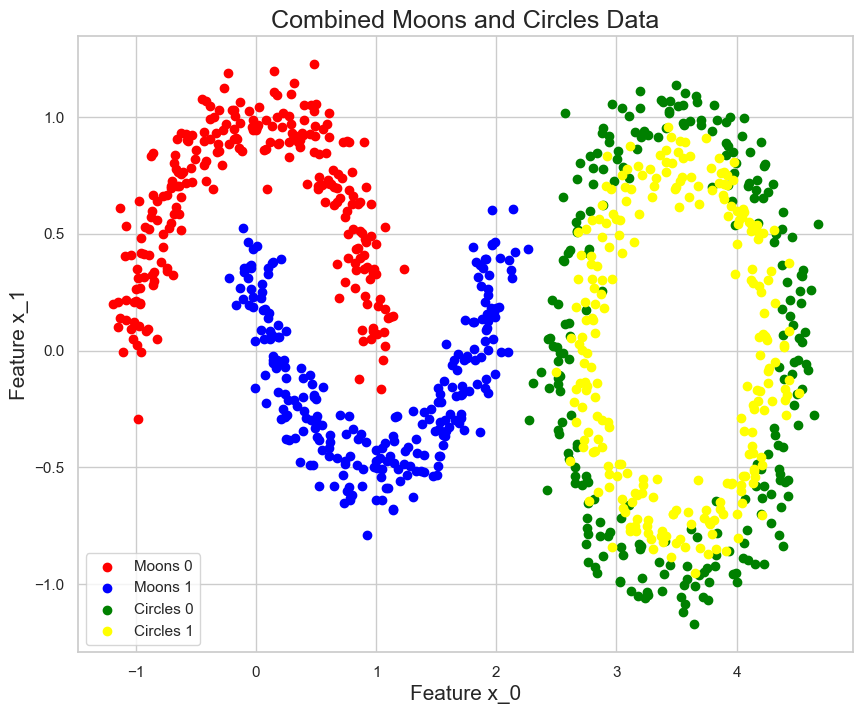

In [41]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

# Generate make_moons and make_circles data
mc_X_moons, mc_y_moons = make_moons(n_samples=500, noise=0.1, random_state=3)
mc_X_circles, mc_y_circles = make_circles(n_samples=500, noise=0.1, random_state=3)

# Offset the circles dataset for better visualization
mc_X_circles[:, 0] += 3.5  # Adjusting x coordinate

# Combine the datasets
mc_X_combined = np.vstack([mc_X_moons, mc_X_circles])
mc_y_combined = np.hstack([mc_y_moons, mc_y_circles + 2])  # Adding 2 to make the labels distinct

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(mc_X_combined[mc_y_combined == 0, 0], mc_X_combined[mc_y_combined == 0, 1], color='red', label='Moons 0')
plt.scatter(mc_X_combined[mc_y_combined == 1, 0], mc_X_combined[mc_y_combined == 1, 1], color='blue', label='Moons 1')
plt.scatter(mc_X_combined[mc_y_combined == 2, 0], mc_X_combined[mc_y_combined == 2, 1], color='green', label='Circles 0')
plt.scatter(mc_X_combined[mc_y_combined == 3, 0], mc_X_combined[mc_y_combined == 3, 1], color='yellow', label='Circles 1')
plt.xlabel('Feature x_0', fontsize=15)
plt.ylabel('Feature x_1', fontsize=15)
plt.title('Combined Moons and Circles Data', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Splitting the moons and circles dataset into training and testing sets
mc_X_train, mc_X_test, mc_y_train, mc_y_test = train_test_split(mc_X_combined, mc_y_combined, test_size=0.4, random_state=6)

# Single Decision Stump Classifier
mc_stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
mc_stump_clf.fit(mc_X_train, mc_y_train)
mc_stump_y_pred = mc_stump_clf.predict(mc_X_test)
print(f"Stump Classification Report")
print(classification_report(mc_y_test, mc_stump_y_pred), "\n")

# Full Decision Tree Classifier
mc_tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
mc_tree_clf.fit(mc_X_train, mc_y_train)
mc_tree_y_pred = mc_tree_clf.predict(mc_X_test)
print(f"Tree Classification Report")
print(classification_report(mc_y_test, mc_tree_y_pred), "\n")

# Bagging Classifier with Decision Stumps
mc_bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                               n_estimators=100, 
                               bootstrap=True, 
                               n_jobs=-1)
mc_bag_clf.fit(mc_X_train, mc_y_train)
mc_bag_y_pred = mc_bag_clf.predict(mc_X_test)
print(f"Bagging Classification Report")
print(classification_report(mc_y_test, mc_bag_y_pred), "\n")



Stump Classification Report
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104
           2       0.46      1.00      0.63        93
           3       0.00      0.00      0.00       107

    accuracy                           0.47       400
   macro avg       0.24      0.50      0.32       400
weighted avg       0.22      0.47      0.30       400
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.97      0.99       104
           2       0.85      0.60      0.70        93
           3       0.73      0.92      0.81       107

    accuracy                           0.88       400
   macro avg       0.89      0.87      0.87       400
weighted avg       0.89      0.88      0.87       400
 



c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging Classification Report
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104
           2       0.46      1.00      0.63        93
           3       0.00      0.00      0.00       107

    accuracy                           0.47       400
   macro avg       0.24      0.50      0.32       400
weighted avg       0.22      0.47      0.30       400
 



c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aweso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
